# Using -pipe- notation

**Connecting unit operations can be simplified through -pipe- notation. As an example, here we create a process with multiple units and connect them as a demonstration.**

With -pipe- notation you can get stream outputs and set stream inputs in the following format:

In [1]:
# U1-n         ->  U1.outs[n]
# U1-[0, 1]    ->  [U1.outs[i] for i in [0, 1]]
# s1-U1        ->  U1.ins[:] = [s1]
# s1-n-U1      ->  U1.ins[n] = s1
# [s1, s2]-U1  ->  U1.ins[:] = [s1, s2]
# U1-n1-n2-U2  ->  U2.ins[n2] = U1.outs[n1]

As an example, create 2 feeds, 2 Mixers and 2 Splitters:

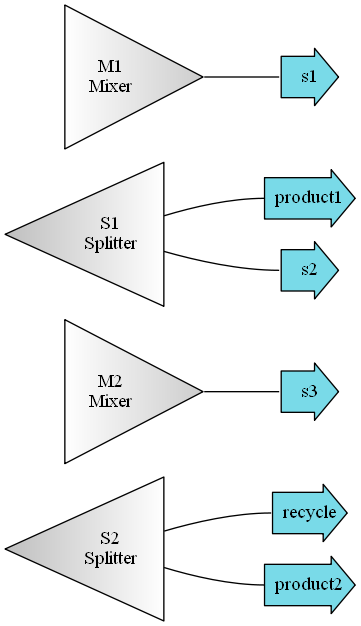

In [2]:
import biosteam as bs
# Set feed stream and units
feed1 = bs.Stream('feed1')
M1 = bs.Mixer('M1', outs='s1')
S1 = bs.Splitter('S1', outs=('s2', 'product1'))
feed2 = bs.Stream('feed2')
M2 = bs.Mixer('M2', outs='s3')
S2 = bs.Splitter('S2', outs=('recycle', 'product2'))
bs.find.diagram()

Now connect streams linearly along the units, and create a loop between S2 and M1:

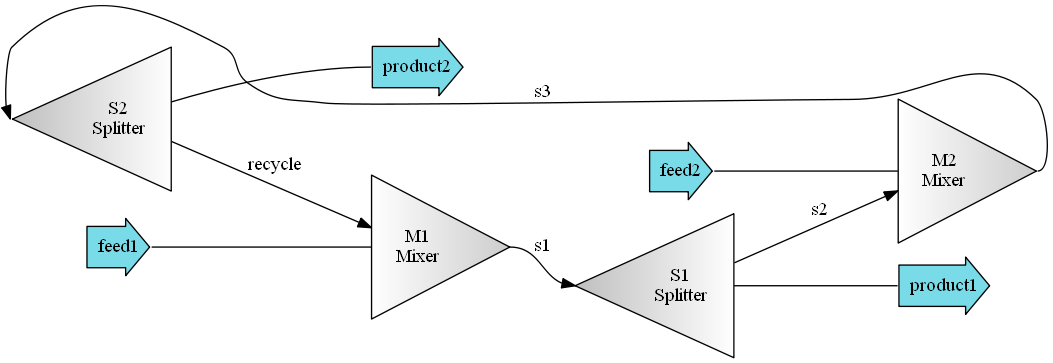

In [3]:
# In -pipe- notation:
(feed1, S2-0)-M1-S1
(feed2, S1-0)-M2-S2

# Without -pipe- notation:
# M1.ins[:] = (feed1, S2.outs[0])
# S1.ins[:] = M1.outs
# M2.ins[:] = (feed2, S1.outs[0])
# S2.ins[:] = M2.outs

bs.find.diagram()